In [1]:
import glob
import os
import pprint
from tqdm import tqdm
from sklearn.utils import Bunch

from IPython import display
import ipywidgets as widgets

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')

import csv
import cv2 as cv

'''from jin import jin_utils

%load_ext version_information
%version_information matplotlib, numpy, pandas, seaborn, cv2, skimage'''

'from jin import jin_utils\n\n%load_ext version_information\n%version_information matplotlib, numpy, pandas, seaborn, cv2, skimage'

In [2]:
base_dir = r'D:\dataset\dental\data'
patient_data = np.load(base_dir + '\\data_KNU_Diorco_so_imgs.npy')
label_csv= open(base_dir + '\\data_KNU_Diorco_so_img_labels.csv', 'r')
label = csv.reader(label_csv)

## 빼야하는 데이터 불러오기

In [3]:
sub_things = pd.read_excel(r'D:\dataset\dental\data\preprocessing\40_test_sample_list_2020-09-24.xlsx',
                          usecols=['Project_id'])

In [4]:
print(sub_things)

   Project_id
0      QH0097
1      QH0101
2      QH0280
3      QH0380
4      QH0399
5      QH0419
6      QH0434
7      QH0475
8      QH0530
9      QH0535
10     QH0561
11     QH0568
12     QH0570
13     QH0577
14     QH0586
15     QH0592
16     QH0600
17     QH0606
18     QH0612
19     QH0616
20     QH0623
21     QH0642
22     QH0645
23     QH0655
24     QH0698
25     QH0767
26     QH0771
27     QH0772
28     QH0821
29     QH0873
30     QH0883
31     QH0897
32     QH0900
33     QH0915
34     QH0931
35     QH0957
36     QH0976
37     QH1034
38     QH1070
39     QH1131


In [5]:
sub_things_list = np.array(sub_things[:])
sub_things_list = sub_things_list.flatten().tolist()

In [6]:
sub_things_list

['QH0097',
 'QH0101',
 'QH0280',
 'QH0380',
 'QH0399',
 'QH0419',
 'QH0434',
 'QH0475',
 'QH0530',
 'QH0535',
 'QH0561',
 'QH0568',
 'QH0570',
 'QH0577',
 'QH0586',
 'QH0592',
 'QH0600',
 'QH0606',
 'QH0612',
 'QH0616',
 'QH0623',
 'QH0642',
 'QH0645',
 'QH0655',
 'QH0698',
 'QH0767',
 'QH0771',
 'QH0772',
 'QH0821',
 'QH0873',
 'QH0883',
 'QH0897',
 'QH0900',
 'QH0915',
 'QH0931',
 'QH0957',
 'QH0976',
 'QH1034',
 'QH1070',
 'QH1131']

## 데이터 불러오기

In [7]:
lines= []

for line in label:
    lines.append(line)

In [8]:
pre_label_df = pd.DataFrame(lines) 

In [9]:
pre_label_df

,0,1,2,3,4
0,patient_id,tx,tx_phase,angle_class_r,angle_class_l
1,QH0026,1,Pre-Tx,1,1
2,QH0026,1,Post-Tx,1,2
3,QH0041,1,Pre-Tx,2,1
4,QH0041,1,Post-Tx,2,1
...,...,...,...,...,...
805,QH1245,1,Post-Tx,1,1
806,QH1248,1,Pre-Tx,1,3
807,QH1248,1,Post-Tx,2,1
808,QH1250,1,Pre-Tx,2,2


In [9]:
len(pre_label_df)

810

## 지울 라벨 데이터의 행을 count_list로 받음

In [10]:
pre_label_df[0][1:]

1      QH0026
2      QH0026
3      QH0041
4      QH0041
5      QH0044
        ...  
805    QH1245
806    QH1248
807    QH1248
808    QH1250
809    QH1250
Name: 0, Length: 809, dtype: object

#### Pre-treatment만 지워야 하므로 

In [11]:
count = 1
count_list = []

for k in pre_label_df[0][1:]:
    print(k)
    if k in sub_things_list:
        print(count)
        count_list.append(count)
    count += 1


QH0026
QH0026
QH0041
QH0041
QH0044
QH0044
QH0059
QH0059
QH0067
QH0067
QH0070
QH0070
QH0083
QH0083
QH0093
QH0093
QH0097
17
QH0097
18
QH0101
19
QH0101
20
QH0102
QH0102
QH0106
QH0106
QH0115
QH0115
QH0123
QH0123
QH0126
QH0126
QH0129
QH0129
QH0145
QH0145
QH0153
QH0153
QH0158
QH0158
QH0162
QH0162
QH0164
QH0164
QH0176
QH0176
QH0178
QH0178
QH0219
QH0219
QH0249
QH0249
QH0252
QH0252
QH0258
QH0258
QH0280
55
QH0280
56
QH0284
QH0284
QH0337
QH0337
QH0348
QH0348
QH0349
QH0349
QH0350
QH0350
QH0351
QH0351
QH0358
QH0358
QH0361
QH0361
QH0367
QH0367
QH0368
QH0368
QH0371
QH0371
QH0376
QH0376
QH0377
QH0377
QH0378
QH0378
QH0379
QH0379
QH0380
87
QH0380
88
QH0388
QH0388
QH0390
QH0390
QH0392
QH0392
QH0394
QH0394
QH0397
QH0397
QH0399
99
QH0399
100
QH0406
QH0406
QH0409
QH0409
QH0410
QH0410
QH0411
QH0411
QH0412
QH0412
QH0414
QH0414
QH0415
QH0415
QH0417
QH0417
QH0419
117
QH0419
118
QH0425
QH0425
QH0427
QH0427
QH0433
QH0433
QH0434
125
QH0434
126
QH0436
QH0436
QH0443
QH0443
QH0444
QH0444
QH0445
QH0445
QH0451
QH0451
Q

In [12]:
len(count_list)

80

In [13]:
count_list

[17,
 18,
 19,
 20,
 55,
 56,
 87,
 88,
 99,
 100,
 117,
 118,
 125,
 126,
 147,
 148,
 193,
 194,
 197,
 198,
 225,
 226,
 233,
 234,
 235,
 236,
 243,
 244,
 251,
 252,
 255,
 256,
 269,
 270,
 277,
 278,
 281,
 282,
 287,
 288,
 295,
 296,
 313,
 314,
 315,
 316,
 327,
 328,
 347,
 348,
 361,
 362,
 369,
 370,
 371,
 372,
 412,
 413,
 454,
 455,
 462,
 463,
 476,
 477,
 480,
 481,
 498,
 499,
 506,
 507,
 531,
 532,
 553,
 554,
 625,
 626,
 663,
 664,
 709,
 710]

In [14]:
print(pre_label_df[0][19])

QH0101


## 라벨 데이터 지우기

In [15]:
label_df = pre_label_df.drop(pre_label_df.index[count_list], inplace=True)

In [16]:
pre_label_df

,0,1,2,3,4
0,patient_id,tx,tx_phase,angle_class_r,angle_class_l
1,QH0026,1,Pre-Tx,1,1
2,QH0026,1,Post-Tx,1,2
3,QH0041,1,Pre-Tx,2,1
4,QH0041,1,Post-Tx,2,1
...,...,...,...,...,...
805,QH1245,1,Post-Tx,1,1
806,QH1248,1,Pre-Tx,1,3
807,QH1248,1,Post-Tx,2,1
808,QH1250,1,Pre-Tx,2,2


In [17]:
pre_label_df.to_csv(r'D:/dataset/dental/data/data_KNU_Diorco_so_img_labels_pre.csv', index=False)

In [19]:
len(pre_label_df)

730

### patient_data 리스트에 맞추기

In [20]:
patient_data.shape

(809, 480, 784, 6)

In [21]:
type(patient_data)

numpy.ndarray

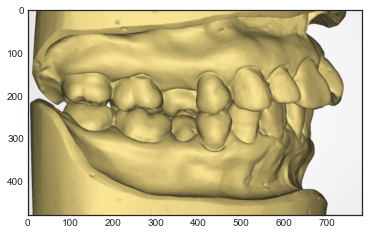

In [22]:
plt.imshow(patient_data[0,:,:,0:3])

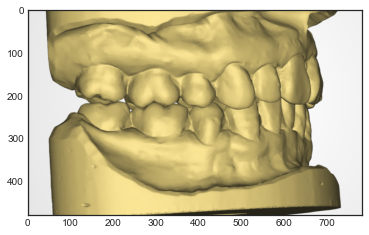

In [27]:
plt.imshow(post_patient_data[0,:,:,0:3])

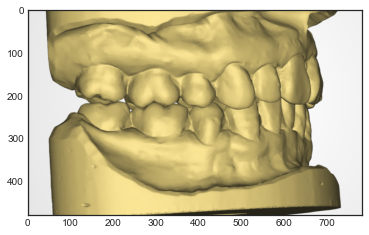

In [28]:
plt.imshow(patient_data[1,:,:,0:3])

In [23]:
new_count = []

for k in range(len(count_list)):
    tmp_new_count = count_list[k] - 1
    new_count.append(tmp_new_count)
    del tmp_new_count

In [25]:
new_count = np.array(count_list)

In [26]:
new_count

array([ 17,  18,  19,  20,  55,  56,  87,  88,  99, 100, 117, 118, 125,
       126, 147, 148, 193, 194, 197, 198, 225, 226, 233, 234, 235, 236,
       243, 244, 251, 252, 255, 256, 269, 270, 277, 278, 281, 282, 287,
       288, 295, 296, 313, 314, 315, 316, 327, 328, 347, 348, 361, 362,
       369, 370, 371, 372, 412, 413, 454, 455, 462, 463, 476, 477, 480,
       481, 498, 499, 506, 507, 531, 532, 553, 554, 625, 626, 663, 664,
       709, 710])

In [27]:
for k in range(3):
    a = new_count - 1
    new_count = a
    print(new_count)

[ 16  17  18  19  54  55  86  87  98  99 116 117 124 125 146 147 192 193
 196 197 224 225 232 233 234 235 242 243 250 251 254 255 268 269 276 277
 280 281 286 287 294 295 312 313 314 315 326 327 346 347 360 361 368 369
 370 371 411 412 453 454 461 462 475 476 479 480 497 498 505 506 530 531
 552 553 624 625 662 663 708 709]
[ 15  16  17  18  53  54  85  86  97  98 115 116 123 124 145 146 191 192
 195 196 223 224 231 232 233 234 241 242 249 250 253 254 267 268 275 276
 279 280 285 286 293 294 311 312 313 314 325 326 345 346 359 360 367 368
 369 370 410 411 452 453 460 461 474 475 478 479 496 497 504 505 529 530
 551 552 623 624 661 662 707 708]
[ 14  15  16  17  52  53  84  85  96  97 114 115 122 123 144 145 190 191
 194 195 222 223 230 231 232 233 240 241 248 249 252 253 266 267 274 275
 278 279 284 285 292 293 310 311 312 313 324 325 344 345 358 359 366 367
 368 369 409 410 451 452 459 460 473 474 477 478 495 496 503 504 528 529
 550 551 622 623 660 661 706 707]


In [28]:
new_count = np.array(count_list)
tmp_new_count = new_count
post_patient_data = patient_data

for i in range(len(new_count)):

    post_patient_data = np.delete(post_patient_data, tmp_new_count[i] - 1, axis = 0)
    print(tmp_new_count[i]-1)
    a = tmp_new_count - 1
    tmp_new_count = a

16
16
16
16
50
50
80
80
90
90
106
106
112
112
132
132
176
176
178
178
204
204
210
210
210
210
216
216
222
222
224
224
236
236
242
242
244
244
248
248
254
254
270
270
270
270
280
280
298
298
310
310
316
316
316
316
355
355
395
395
401
401
413
413
415
415
431
431
437
437
460
460
480
480
550
550
586
586
630
630


In [29]:
len(post_patient_data)

729

In [30]:
len(patient_data)

809

In [31]:
post_patient_data.shape

(729, 480, 784, 6)

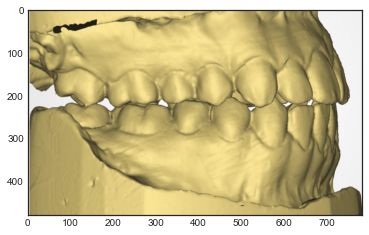

In [29]:
plt.imshow(post_patient_data[17, :, :, 0:3])

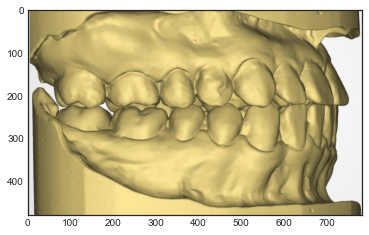

In [30]:
plt.imshow(patient_data[19,:,:,0:3])

## 빼야 할 것이 빠진 patient_data를 저장

In [32]:
np.save(base_dir + '\\data_KNU_Diorco_so_imgs_p.npy', post_patient_data)

## 빼야 할 것이 빠진 label을 npy로 저장

In [33]:
label_csv= open(base_dir + '\\data_KNU_Diorco_so_img_labels_pre.csv', 'r')
label = csv.reader(label_csv)

In [34]:
right_label = []
left_label = []

for line in label:
    right_label.append(line[3])
    left_label.append(line[4])

right_label = right_label[1:]
left_label = left_label[1:]

right_label = list(map(int, right_label))
left_label = list(map(int, left_label))

right_label = np.array(right_label)
left_label = np.array(left_label)

patient_labels = []
patient_labels.extend(left_label)
patient_labels.extend(right_label)
patient_labels = np.array(patient_labels)

np.save(base_dir + '\\label_08.npy', patient_labels)